NEXT: SEGMENT


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\aroue\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-6b359aa69073>", line 132, in <module>
    segmenter = Segmenter(imgf)
  File "C:\Users\aroue\Downloads\Documents\@ML\Mozart\src\segmenter.py", line 15, in __init__
    self.no_staff_img = remove_staff_lines(
  File "C:\Users\aroue\Downloads\Documents\@ML\Mozart\src\staff.py", line 59, in remove_staff_lines
    return hv_decode(n_rle, n_vals, shape)
  File "C:\Users\aroue\Downloads\Documents\@ML\Mozart\src\rle.py", line 49, in hv_decode
    starts = [[int(np.sum(arr[:i])) for i in range(len(arr))] for arr in rle]
  File "C:\Users\aroue\Downloads\Documents\@ML\Mozart\src\rle.py", line 49, in <listcomp>
    starts = [[int(np.sum(arr[:i])) for i in range(len(arr))] for arr in rle]



KeyboardInterrupt



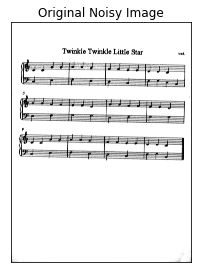

In [50]:
def make_image(data, outputname, size=(128, 200), dpi=80):
    fig = plt.figure()
    fig.set_size_inches(size)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.gray()
    ax.imshow(data, aspect='equal')
    plt.show()
    #plt.savefig(outputname, dpi=dpi)


import cv2
from commonfunctions import *
from pre_processing import *
from staff import calculate_thickness_spacing, remove_staff_lines, coordinator
from segmenter import Segmenter
from connected_componentes import  *
from fit import predict
from box import Box
import skimage.io as io
import glob
import cv2
import pickle
from PIL import Image
import numpy as np
from wand.image import Image
from wand.display import display
from imutils import resize as im_resize
from scipy.ndimage import binary_fill_holes
from skimage.morphology import skeletonize, thin
from skimage.filters import threshold_otsu, gaussian, median, threshold_yen

input_path=r"C:\Users\aroue\Downloads\Documents\@ML\Sheet Music\goodsheet\twinkle-skewed.png"
img_name = input_path.split('/')[-1]
imgs_path = input_path[:-len(img_name)]



img = cv2.imread(input_path,0)
#gray = get_gray(img_decoded)
#gray = gray.astype("uint8")
ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#READ IMAGE
#img = io.imread(f'{imgs_path}{img_name}')

#DESKEW
skewed = Image.from_array(img)
skewed.format = 'bmp'
skewed.alpha_channel = False
skewed.deskew(0.4*skewed.quantum_range)
skewed.save(filename='table_deskew1.png')
img_buffer = np.asarray(bytearray(skewed.make_blob()), dtype='uint8')

plt.subplot(3,1,1), plt.imshow(imgf,cmap = 'gray')
plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([])

#BINARIZATION
imgf = cv2.imdecode(img_buffer, cv2.IMREAD_UNCHANGED)




#imgf=np.array(skewed)

#print(type(skewed))
#print(type(imgf))
# with Image.from_array(imgf) as png:
#     png.deskew(0.4*png.quantum_range)
    #img.save(filename='table_deskew.png')
    #display(png)
    
# with Image(imgf) as png:
#     png.deskew(0.4*png.quantum_range)
#     #img.save(filename='table_deskew.png')
#     display(png)


# horizontal = IsHorizontal(imgf)
# print("horizontal?" + str(horizontal))
# if horizontal == False:
#     theta = deskew(imgf)
#     imgf = rotation(imgf,theta)
#     imgf = get_gray(imgf)
#     imgf = get_thresholded(imgf, threshold_otsu(imgf))
#     imgf = get_closer(imgf)
#     horizontal = IsHorizontal(imgf)

    #show_images([img])
# plt.title('Otsu Horizontal'), plt.xticks([]), plt.yticks([])
# plt.show()

# plt.subplot(3,1,1), plt.imshow(img,cmap = 'gray')
# plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([])
# #plt.subplot(3,1,2), plt.hist(img.ravel(), 256)
# #plt.axvline(x=ret, color='r', linestyle='dashed', linewidth=2)
# #plt.title('Histogram'), plt.xticks([]), plt.yticks([])
# plt.subplot(3,1,3), plt.imshow(imgf,cmap = 'gray')
# plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
# plt.show()

#img = gray_img(img)

# original = img.copy()
# img = otsuMethod(img)
# print(type(img))
# im = Image.fromarray(img)
# rgb_im = im.convert('RGB')

#rgb_im.save("your_file.png")
imgf = get_gray(imgf)
#imgf = get_thresholded(gray, threshold_otsu(gray))
# g = threshold_yen(gray)
# print(g)
# rag = 1*(gray > 230)

#show_images([gray, original], ['Gray', 'Binary'])
print("NEXT: SEGMENT")
#show_images([bin_img[0]])
#img = Image.fromarray(bin_img, 'RGB')
#img.save('my.png')
#img.show()

#gray = 1*gray[gray > 250] = 1
# plt.rcParams["figure.figsize"] = (20,29)
# plt.gray()
# plt.imshow(rag, interpolation='nearest')
# plt.show()
# print(gray[0])
#show_images([imgf])

segmenter = Segmenter(imgf)
imgs_with_staff = segmenter.regions_with_staff
imgs_without_staff = segmenter.regions_without_staff
show_images([imgs_with_staff[0]])
show_images([imgs_without_staff[0]])

for i, img in enumerate(imgs_with_staff):
    plt.rcParams["figure.figsize"] = (20,15)
    plt.gca().set_axis_off()
    plt.gca().set_title("")
    fig=plt.imshow(imgs_with_staff[i],interpolation='nearest')
    #fig.axes.get_xaxis().set_visible(False)
    #plt.axis("off")
    #plt.show()
    #show_images([imgs_with_staff[i]])
    plt.savefig('output\slice'+str(i)+'.png',
    bbox_inches='tight', pad_inches=0, format='png', dpi=600)


#     #make_image(imgs_with_staff[i], '/tmp/out.png')
    
#     plt.gray()
#     plt.axis('off')
    
#     plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
#                 hspace = 0, wspace = 0)
#     plt.margins(0,0)
    #plt.imshow(imgs_with_staff[i], interpolation='nearest')



In [ ]:
from scipy.io.wavfile import write

In [ ]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image, ImageChops
#img = cv2.imread(r'C:\Users\aroue\Downloads\Documents\@ML\Sheet Music\Analyze_This\cleaned\slice0.png') # Read in the image and convert to grayscale
img = Image.open(r'C:\Users\aroue\Downloads\Documents\@ML\Sheet Music\Analyze_This\cleaned\slice0.png') # Read in the image and convert to grayscale
pixels = img.load()

print (f"original: {img.size[0]} x {img.size[1]}")
xlist = []
ylist = []
for y in range(0, img.size[1]):
    for x in range(0, img.size[0]):
        if pixels[x, y] != (255, 255, 255, 255):
            xlist.append(x)
            ylist.append(y)
left = min(xlist)
right = max(xlist)
top = min(ylist)
bottom = max(ylist)


img = img.crop((left-10, top-10, right+10, bottom+10))
print (f"new: {img.size[0]} x {img.size[1]}")
plt.rcParams["figure.figsize"] = (20,15)
plt.gca().set_axis_off()
plt.gca().set_title("")
fig=plt.imshow(img,interpolation='nearest')

#imshow(np.asarray(img))
#img.show()